# Input/Output Parameters

**Learning more about the ```io``` section of the parameter tree - how to save the final result and intermediates into ```.ptyr``` files.**

In the ```p.io``` section of the parameter tree we can specify where we would like our output to be written to. First, we can set a root directory for all further input/output operations, e.g. "/tmp"
```python
p.io.home = "/tmp"
```

PtyPy saves its results into ```.ptyr``` files which are basically [HDF5](https://docs.hdfgroup.org/hdf5/develop/) files and can therefore be inspected by any software/library that supports the HDF5 format, e.g. [h5py](https://docs.h5py.org/en/stable/). We can now specify that the main output file should be placed in a subfolder ```recon```  relative to the root directory
```python
p.io.rfile =  "recons/%(run)s_%(engine)s_%(iterations)04d.ptyr"
```
where ```%(run)s``` is dynamically replaced by the string defined in ```p.run```, ```%(engine)s``` by the name of the engine used for the reconstructions and ```%(iterations)04d``` by the total number of iterations at the end formatted as a 4-digit integer.

There is also the option to auto-save intermediate states of the reconstruction at a given ```interval``` into a subfolder ```dumps``` relative to the root directory
```python
p.io.autosave = u.Param()
p.io.autosave.active = True
p.io.autosave.interval = 10
p.io.autosave.rfile = 'dumps/%(run)s_%(engine)s_%(iterations)04d.ptyr'
```
where ```%(run)s```, ```%(engine)s``` and ```%(iterations)04d``` are again dynamic labels.

And finally, PtyPy has some live-viewing capabilities that can be controlled with ```p.io.interaction``` and ```p.io.autoplot```, see [Live visualisation](../Advanced_Topics/visualisation.ipynb) for more details. In this example, we just turn those features off
```python
p.io.autoplot = u.Param(active=False)
p.io.interaction = u.Param(active=False)
```

<div class="alert alert-warning" markdown="1">
    <strong>Exersice</strong><br>Modify the <code>p.io.home</code> path in the example below to wherever you would like the PtyPy output to be, run the reconstruction and observe all the new files saved to <code>p.io.home</code>. Use <code>ptypy.utils.plot_recon_from_ptyr</code> to look at the MoonFlower reconstruction at different iterations. 
</div>

<div class="alert alert-success" markdown="1">
    <strong>Hint</strong><br>You can use shell commands within Jupyter notebooks to explore the filesystem, i.e. <code>ls /tmp</code> to list all files in /tmp.
</div>

---

In [1]:
import ptypy
import ptypy.utils as u

p = u.Param()
p.verbose_level = "interactive"

# Run label (ID)
p.run = "moonflower"

# I/O settings
p.io = u.Param()

# Set the root path for all input/output operations
# Change this to wherever you would like 
p.io.home = "/tmp"

# Path to final .ptyr output file 
# using variables p.run, engine name and total nr. of iterations
p.io.rfile =  "recons/%(run)s_%(engine)s_%(iterations)04d.ptyr"

# Save intermediate .ptyr files (dumps) every 10 iterations
p.io.autosave = u.Param()
p.io.autosave.active = True
p.io.autosave.interval = 10
p.io.autosave.rfile = 'dumps/%(run)s_%(engine)s_%(iterations)04d.ptyr'

# Turn off auto plotting
p.io.autoplot = u.Param(active=False)
p.io.interaction = u.Param(active=False)

p.scans = u.Param()
p.scans.MF = u.Param()
p.scans.MF.name = "Full"
p.scans.MF.data= u.Param()
p.scans.MF.data.name = "MoonFlowerScan"
p.scans.MF.data.shape = 128
p.scans.MF.data.num_frames = 200
p.scans.MF.data.save = None
p.scans.MF.data.density = 0.2
p.scans.MF.data.photons = 1e8
p.scans.MF.data.psf = 0

p.engines = u.Param()
p.engines.engine00 = u.Param()
p.engines.engine00.name = "DM"
p.engines.engine00.numiter = 80

P = ptypy.core.Ptycho(p,level=5)

Full: loading data for scan MF (161 diffraction frames, 161 PODs, 1 probe(s) and 1 object(s))
Full: loading data for scan MF (reformatting probe/obj/exit)
Full: loading data for scan MF (initializing probe/obj/exit)
DM: initializing engine
DM: preparing engine
DM: Iteration # 80/80 :: Fourier 5.41e+01, Photons 1.58e+01, Exit 4.94e+00
==== This reconstruction relied on the following work ==========================
The Ptypy framework:
    Enders B. and Thibault P., "A computational framework for ptychographic reconstructions" Proc. Royal Soc. A 472 (2016) 20160640, doi: 10.1098/rspa.2016.0640.
The difference map reconstruction algorithm:
    Thibault et al., "Probe retrieval in ptychographic coherent diffractive imaging" Ultramicroscopy 109 (2009) 338, doi: 10.1016/j.ultramic.2008.12.011.


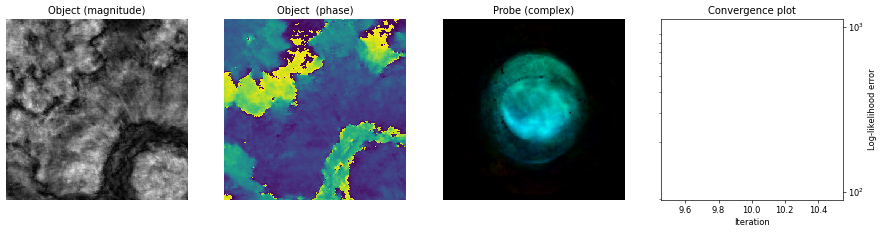

In [5]:
import ptypy.utils as u
import os
ptyr_filename = os.path.join(p.io.home, "dumps/moonflower_DM_0010.ptyr")
u.plot_recon_from_ptyr(ptyr_filename)